# `006-compute-grad`

Task: compute the gradient of a function

## Setup

In [1]:
import torch
from torch import tensor
import matplotlib.pyplot as plt
%matplotlib inline

## Task

Suppose we have a dataset with just a single feature `x` and continuous outcome variable `y`.

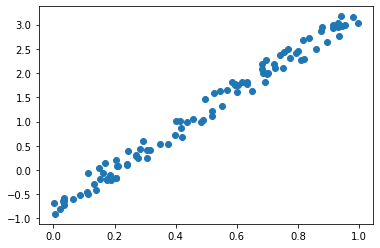

In [2]:
torch.manual_seed(0)
x = torch.rand(100)
noise = torch.rand_like(x) * .5
y_true = 4 * x + noise - 1
plt.scatter(x, y_true);

Let's fit a line to that!

In linear regression, we predict an output by computing `y_pred = weights * x + bias`.
We set `weights` and `bias` in a way that minimizes the mean squared error `mse_loss = (y_pred - y_true).pow(2).mean()`.

Let's set `weights` and `bias` to some arbitrary values and see what `mse_loss` comes out to be.

tensor(0.3251)

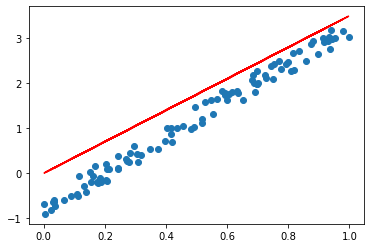

In [33]:
weights = tensor([3.5])
bias = tensor(0.0)
y_pred = weights * x + bias
plt.scatter(x, y_true); plt.plot(x, y_pred, 'r')
mse_loss = (y_pred - y_true).pow(2).mean()
mse_loss

Let's find what changes we could make to `weights` or `bias` that would reduce `mse_loss`. **Your task**:

1. Use PyTorch to compute the gradient of `weights` with respect to `mse_loss`.
2. Use that gradient to work out (by hand!) a new fixed value for `weights`.
3. Recompute `mse_loss` and see that it does go down. (If it doesn't, reconsider what you did in Step 2.)
4. Repeat the 3 steps above for `bias`.

## Solution

In [4]:
# Your code here

### weights

In [13]:
weights = tensor([3.5], requires_grad=True)
bias = tensor(0.0)
y_pred = weights * x + bias
mse_loss = (y_pred - y_true).pow(2).mean()
mse_loss.backward()
weights.grad

tensor([0.4150])

Let's use a learning rate of 0.1. And remember we want loss to go *down*, so we need to step *opposite* the gradient.

In [27]:
3.5 - .4150 * .1

3.4585

In [28]:
weights = tensor(3.4585)
bias = tensor(0)
y_pred = weights * x + bias
mse_loss = (y_pred - y_true).pow(2).mean()
mse_loss

tensor(0.3084)

In [29]:
weights = tensor(3.4585)
bias = tensor(0.0, requires_grad=True)
y_pred = weights * x + bias
mse_loss = (y_pred - y_true).pow(2).mean()
mse_loss.backward()
bias.grad

tensor(1.0119)

In [30]:
weights = tensor(3.4585)
bias = tensor(-.10119)
y_pred = weights * x + bias
mse_loss = (y_pred - y_true).pow(2).mean()
mse_loss

tensor(0.2163)

## Analysis

What is the true value of `weights`? Did your first change to `weights` get you closer to that value? Explain.

## Extension (optional)

1. Put the code above in a loop that changes `weights` and `bias` to minimize `mse_loss`.
2. What is the minimum value that `mse_loss` could possibly take in this situation?
3. Would it be possible to also change `x` or `y` to reduce `mse_loss`? Can you think of a situation where you might want to do that?